# Credit Card Fraud || Dealing with Imbalanced Datasets

## Introduction

In this Notebook, I will be performing data analysis of the [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?datasetId=310&sortBy=voteCount) from Kaggle. The main goal is to deal with the imbalance dataset, as well as to create a prediction model that is able to predict whether a transaction is fradulant or not.

### Dataset

As described on Kaggle, the dataset contains transactions made by credit cards in September 2013 by European cardholders.

It presents transactions that occurred over two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, where the positive class (frauds) only accounts for 0.172% of all transactions.

Variable  |Description |
-----|-----| 
Time|The seconds elapsed between each transaction and the first transaction in the dataset|
V1 - V28|Principal Components obtained with PCA|
Amount|The transaction Amount|
Class|The response variable and it takes value 1 in case of fraud and 0 otherwise|

### Objectives

1. Create prediction models based on the original dataset
2. Create prediction models using a **Undersampled** dataset
3. Create prediction models using a **Oversampled** dataset
4. Compare results of the above

### Approach
* For the first instance, we will create a logistic regression model trained using the original dataset.
* Next, we will create an undersampled dataset and evaluate a logistic regression model trained on it.
* We will then create an oversampled dataset and evaluate a logistic regression model trained on it.


## Imports

-   Import packages
-   Load dataset

### Importing Packages

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

#### Load Dataset

In [2]:
# Load the .csv file into a dataframe
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Exploration (Initial EDA and data cleaning)

- Understand the variables
- Clean the dataset (missing data, redundant data, outliers) 

### Basic Information of the Dataset

In [3]:
# Gather basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Check For NAs

In [4]:
# Check for NAs
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no Nulls

### Check for Duplicates

In [5]:
# Check for Duplicates
df.duplicated().sum()

1081

There are 1,081 duplicates detected, which amounts to around 0.38% of the data.

**How likely is it that these are legitimate entries?**

We could perform a likelihood analysis by essentially applying Bayes' theorem and multiplying the probabilities of finding each value in each column.

However, with several continuous variables across 30 columns, it seems very unlikely that these observations are legitimate. We can proceed by dropping them.

### Gather Descriptive Statistics of the Data

In [6]:
# Descriptive Statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


* The transaction amount is relatively small. The mean of all the 'Amounts' made is approximately $88.
* The time between transaction is quite long. The mean of all the 'Time' elapse is approximately 26 Hours.
* From the Max of Time we can see indeed the transactions takes place over 2 days (or 172,792 Seconds)

### Visualisations

#### Distribution of Class

Text(0.5, 1.0, 'Class Distributions \n (0 = No Fraud, 1 = Fraud)')

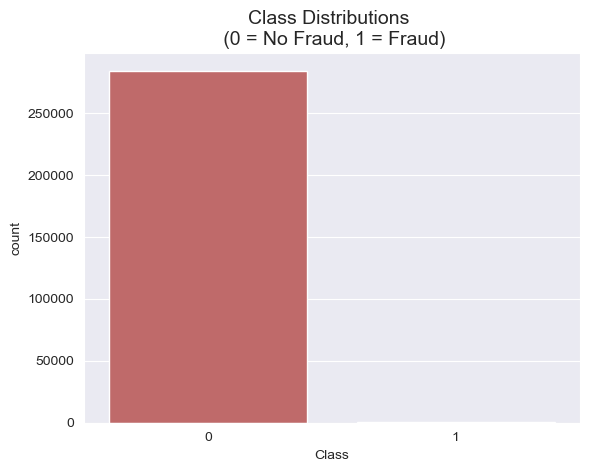

In [7]:
# Visualise the imbalance dataset
colors=['IndianRed','CornflowerBlue']
sns.countplot(x = 'Class', data = df, palette = colors)
plt.title('Class Distributions \n (0 = No Fraud, 1 = Fraud)', fontsize=14)

In [8]:
# Get numbers of Fraud vs. Legitimate Transactions
print(df['Class'].value_counts())
print()
# Get percentages of Fraud vs. Legitimate
print(df['Class'].value_counts(normalize=True))

0    284315
1       492
Name: Class, dtype: int64

0    0.998273
1    0.001727
Name: Class, dtype: float64


Only 492 (or 0.172%) of transaction are fraudulent. That means the data is highly unbalanced with respect with target variable Class.

And the issue with unbalanced data in a binary classification problem, is that if one class has a much larger number of samples than the other, it can lead to several issues such as,

- Biased Model Performance: Machine learning algorithms tend to perform poorly on unbalanced data because they are biased towards the majority class. The model will have a higher accuracy on the majority class but may perform poorly on the minority class.

- Misclassification of Minority Class: Since the minority class has fewer samples, the model might struggle to learn its patterns effectively. As a result, the minority class instances could be misclassified more often, leading to false negatives or poor recall.

- Difficulty in Learning Patterns: Unbalanced data can make it harder for the algorithm to identify the underlying patterns of the minority class. The model might not generalize well to new, unseen data.

- Inaccurate Evaluation: Standard evaluation metrics like accuracy can be misleading on unbalanced data. A model that predicts only the majority class could have a high accuracy but be practically useless.

- Loss of Information: The scarcity of minority class samples might cause the model to ignore valuable information about that class, leading to suboptimal predictions.

- Model Overfitting: In some cases, a model might overfit the minority class due to its scarcity, resulting in poor generalization to new data.

- Bias Amplification: If the minority class is more important in your problem domain (e.g., detecting fraudulent transactions), the model's inability to handle the minority class can have serious consequences.

### Distribution of Time and Amount

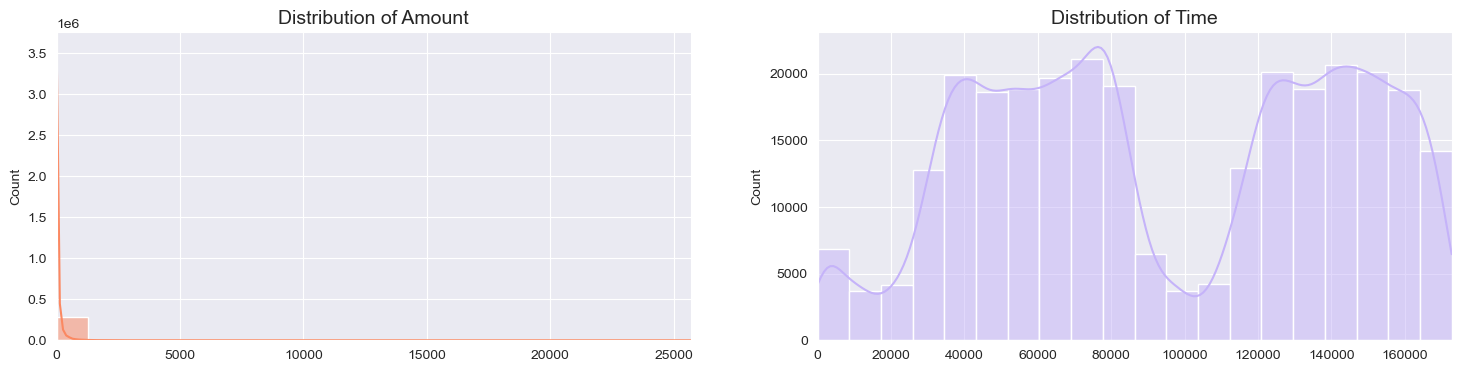

In [9]:
# plot a histogram for Time and Amount
amount_val = df['Amount'].values
time_val = df['Time'].values
fig, ax = plt.subplots(1, 2, figsize=(18,4))
# Amount
sns.histplot(amount_val, ax=ax[0], color='#FB8861', kde=True, bins=20)
ax[0].set_title('Distribution of Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
# Time
sns.histplot(time_val, ax=ax[1], color='#C5B3F9', kde=True, bins=20)
ax[1].set_title('Distribution of Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show()

We can see that amount is skewed to the right, and Time has a Bimodal distribution. We can also see that these variables have yet to be scaled. And since the other variables have been scaled we will have to scale both Time and Amount as well.

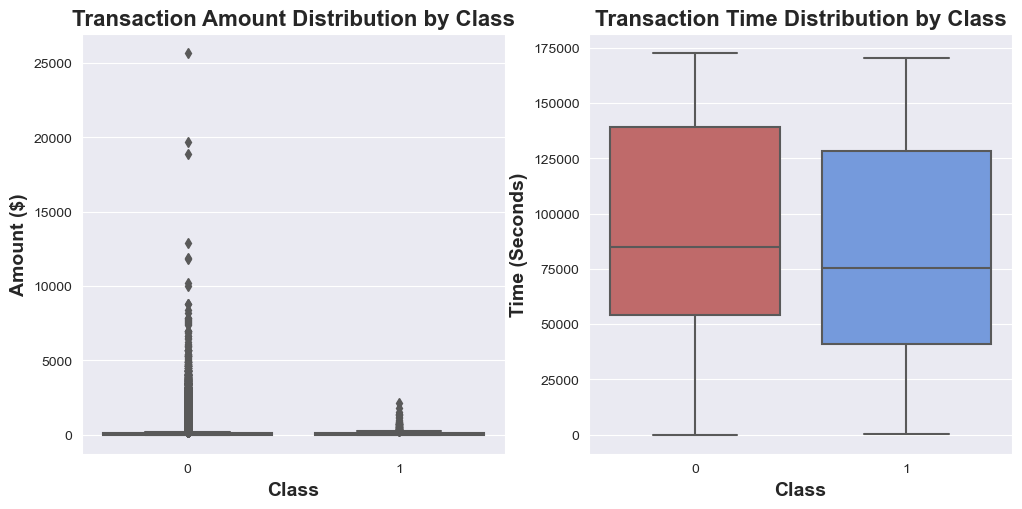

In [10]:
# Box plots for Amount and Time
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(2,2,1)
ax = sns.boxplot(x="Class", y="Amount", data=df[["Amount", "Class"]], palette = colors)
ax.set_title("Transaction Amount Distribution by Class", fontdict={"weight": "bold", "fontsize": 16})
ax.set_xlabel("Class", fontdict={"weight": "bold", "fontsize": 14})
ax.set_ylabel("Amount ($)", fontdict={"weight": "bold", "fontsize": 14})

ax = fig.add_subplot(2,2,2)
ax = sns.boxplot(x="Class", y="Time", data=df[["Time", "Class"]], palette = colors)
ax.set_title("Transaction Time Distribution by Class", fontdict={"weight": "bold", "fontsize": 16})
ax.set_xlabel("Class", fontdict={"weight": "bold", "fontsize": 14})
ax.set_ylabel("Time (Seconds)", fontdict={"weight": "bold", "fontsize": 14})

plt.show()

From the box plots, we can see that legitimate transactions have larger Amount outliers, and the median Time for fraud is lower.

<AxesSubplot:xlabel='Class', ylabel='Amount'>

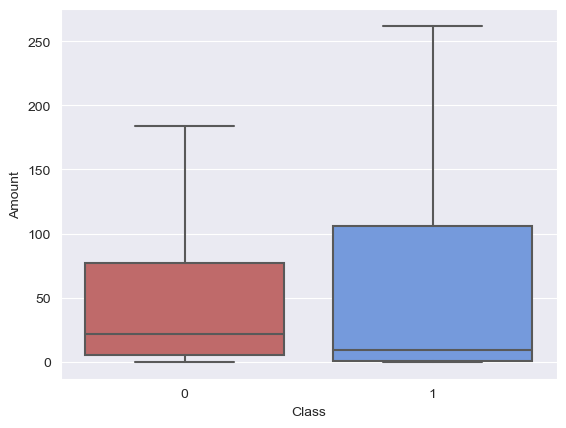

In [11]:
# Boxplot without outliers
sns.boxplot(x="Class", y="Amount", data=df[["Amount", "Class"]], palette = colors, showfliers=False)

If we were to look at the box plot for amount without the outliers, we can see that the median for fraudulant transaction is lower.

### Data Cleaning

#### Drop Duplicates

In [12]:
# Drop duplicates
df = df.drop_duplicates(keep='first')

# Validating
df.duplicated().sum()

0

#### Scale Time and Amount

In [13]:
from sklearn.preprocessing import StandardScaler

# Scalling Time and Amount
df['scaled_amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)
df[['scaled_amount','scaled_time']].head()

,scaled_amount,scaled_time
0,0.244200,-1.996823
1,-0.342584,-1.996823
2,1.158900,-1.996802
3,0.139886,-1.996802
4,-0.073813,-1.996781


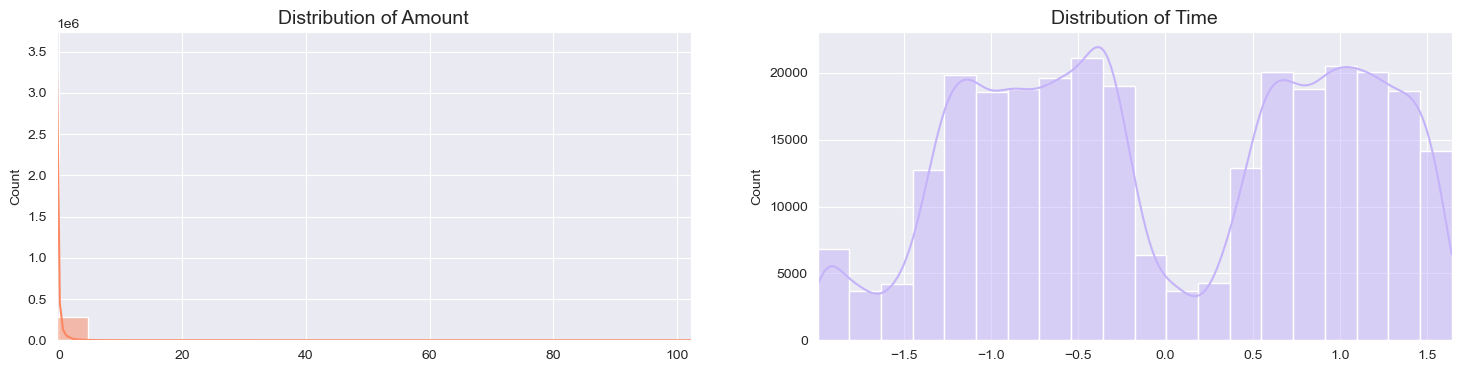

In [14]:
# plot a histogram for Scaled Time and Amount
amount_val = df['scaled_amount'].values
time_val = df['scaled_time'].values
fig, ax = plt.subplots(1, 2, figsize=(18,4))
# Amount
sns.histplot(amount_val, ax=ax[0], color='#FB8861', kde=True, bins=20)
ax[0].set_title('Distribution of Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
# Time
sns.histplot(time_val, ax=ax[1], color='#C5B3F9', kde=True, bins=20)
ax[1].set_title('Distribution of Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show()

## Classification (w/o Resampling)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [16]:
# Split the data into training and testing sets (80% Training, 20% Test)
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the Model

In [17]:
# Find the best estimator from GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]} # l2 ridge
model = LogisticRegression(max_iter=1000)
lr = GridSearchCV(model, grid, cv=10)
lr.fit(X_train, y_train)

print("tuned hyperparameters : ", lr.best_params_)
print("accuracy :", lr.best_score_)

tuned hyperparameters :  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.9991805445413693


In [18]:
# Use the best estimator from GridSearchCV
# Initialize the models
model = LogisticRegression(**lr.best_params_, max_iter=1000)

# Train the models on the training data
model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000)

We can see that without any resampling the model performed really well on the training set, achieving 99.92% accuracy, however this is not an indication of the actual performance of the model.

### Evaluate the Model

In [19]:
# Make predictions on the test data
def model_eval(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    # Evaluate the models
    cf = confusion_matrix(y_test, y_pred)
    print(title, ":")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    sns.heatmap(cf, annot=True, cmap=sns.color_palette("vlag", as_cmap=True), fmt=".0f")
    plt.title(title + " Confusion Matrix", fontsize=14)

Logistic Regression :
Accuracy: 0.9991365030134283
Precision: 0.8867924528301887
Recall: 0.5222222222222223
F1 Score: 0.6573426573426574


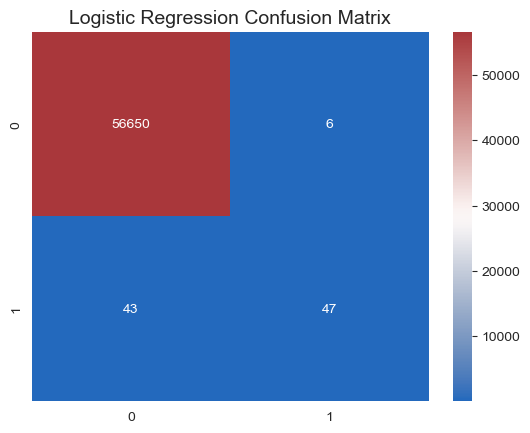

In [20]:
model_eval(model, X_test, y_test, "Logistic Regression")

These results collectively suggest that the Logistic Regression model is performing well in terms of overall accuracy. However, the precision indicates that the model is quite good at correctly labeling the majority instances (0 : No Fraud), but the recall suggests that it may not be capturing all of the minority instances (1 : Fraud) in the dataset.

we can see that while the high scores are indicative of a well-performing model, they also raise a concern about potential overfitting. Overfitting occurs when a model learns the noise and specific details of the training data to the point that it has limited ability to generalize to new data. The ultimate goal of a machine learning model is to generalize well to new, unseen data. While the high scores are promising, its low recall scores shows that it has issues identifying the minority class.

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

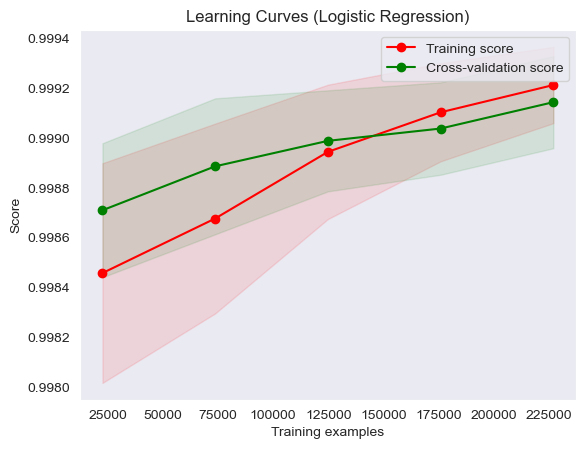

In [21]:
# Plot learning curves
from sklearn.model_selection import learning_curve

# Create a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=4)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
plot_learning_curve(model, "Learning Curves (Logistic Regression)", X, y)

When the learning curves of a machine learning model crisscross, it indicates an unusual and potentially problematic behavior in the model's performance. Learning curves typically show the relationship between the training set size and the model's performance on both the training data and the validation (or test) data. The usual behavior is that as the training set size increases, the training and validation scores stabilize and converge toward a certain value.

One reason for the criss cross is severe class imbalance in the dataset, the learning curves might crisscross if the model is having difficulty learning from the minority class due to limited examples.

## Classification (Resampling)

### Undersampling

We will be cluster centroids to select samples from the majority class,

Using clustering for undersampling, involves applying the clustering algorithm to the majority class instances in order to group them into clusters. These clusters are then used to select representative instances for undersampling, ultimately aiming to balance the class distribution.

In [22]:
# Using Cluster Centroids to undersample
from imblearn.under_sampling import ClusterCentroids
from collections import Counter

In [23]:
# Initialize the ClusterCentroids sampler
cluster_centroids = ClusterCentroids(sampling_strategy='auto', random_state=42)

# Resample the training data
X_undersampled, y_undersampled = cluster_centroids.fit_resample(X_train, y_train)

# Print class distribution before and after resampling
print("Class distribution before undersampling:", Counter(y_train))
print("Class distribution after undersampling:", Counter(y_undersampled))

Class distribution before undersampling: Counter({0: 226597, 1: 383})
Class distribution after undersampling: Counter({0: 383, 1: 383})


### Oversampling

We will be using SMOTE to oversample the dataset,

SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to address the class imbalance problem in machine learning, specifically in the context of binary classification. It works by generating synthetic samples for the minority class to balance the class distribution. The objective is to create new instances that are similar to existing minority class instances while avoiding overfitting.

In [24]:
# SMOTE
from imblearn.over_sampling import SMOTE

In [25]:
# Count the class distribution before applying SMOTE
print("Class distribution before oversampling:", Counter(y))

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_oversampled, y_oversampled = smote.fit_resample(X, y)

# Count the class distribution after applying SMOTE
print("Class distribution after oversampling:", Counter(y_oversampled))

Class distribution before oversampling: Counter({0: 283253, 1: 473})
Class distribution after oversampling: Counter({0: 283253, 1: 283253})


### Train the Models

In [26]:
# Split the data into training and testing sets (80% Training, 20% Test)
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=42)

# Split the data into training and testing sets (80% Training, 20% Test)
X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42)

In [27]:
# Find the best estimator for the undersampled from GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]} # l2 ridge
model = LogisticRegression(max_iter=1000)
lr = GridSearchCV(model, grid, cv=10)
lr.fit(X_under_train, y_under_train)

print("Tuned Hyperparameters : ", lr.best_params_)
print("Accuracy :", lr.best_score_)

Tuned Hyperparameters :  {'C': 0.1, 'penalty': 'l2'}
Accuracy : 0.9314119513484928


In [28]:
# Use the best estimator from GridSearchCV
# Initialize the models
under_model = LogisticRegression(**lr.best_params_, max_iter=1000)

# Train the models on the training data
under_model.fit(X_under_train, y_under_train)

LogisticRegression(C=0.1, max_iter=1000)

In [29]:
# Find the best estimator from GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]} # l2 ridge
model = LogisticRegression(max_iter=1000)
lr = GridSearchCV(model, grid, cv=10)
lr.fit(X_train, y_train)

print("tuned hyperparameters : ", lr.best_params_)
print("accuracy :", lr.best_score_)

tuned hyperparameters :  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.9991805445413693


In [30]:
# Use the best estimator from GridSearchCV
# Initialize the models
over_model = LogisticRegression(**lr.best_params_, max_iter=1000)

# Train the models on the training data
over_model.fit(X_over_train, y_over_train)

LogisticRegression(C=0.1, max_iter=1000)

### Evaluate the Models

Logistic Regression (Undersampling) :
Accuracy: 0.961038961038961
Precision: 0.972972972972973
Recall: 0.9473684210526315
F1 Score: 0.9599999999999999


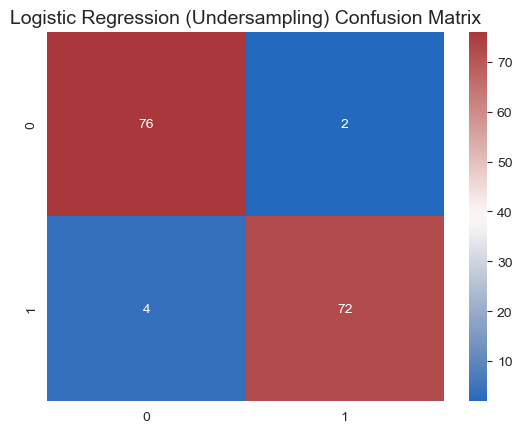

In [31]:
model_eval(under_model, X_under_test, y_under_test, "Logistic Regression (Undersampling)")

Logistic Regression (Oversampling) :
Accuracy: 0.9451819032320701
Precision: 0.9727170868347339
Recall: 0.9164306198208976
F1 Score: 0.9437353359483281


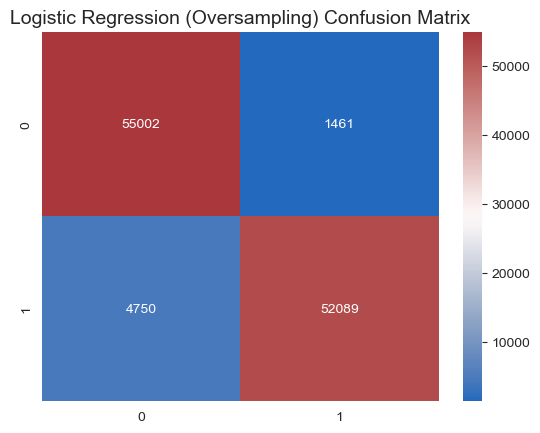

In [32]:
model_eval(over_model, X_over_test, y_over_test, "Logistic Regression (Oversampling)")

We can see that after resampling, the recall score increased significantly, this shows that we have improved the model's ability to correctly identify Fraudulant transactions. 

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

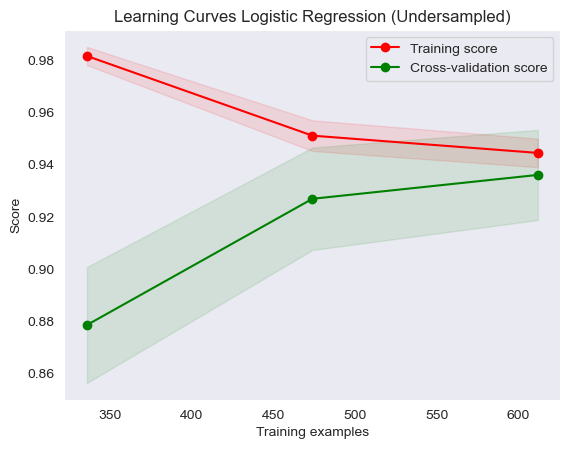

In [33]:
# Plot learning curves
plot_learning_curve(under_model, "Learning Curves Logistic Regression (Undersampled)", X_undersampled, y_undersampled)

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

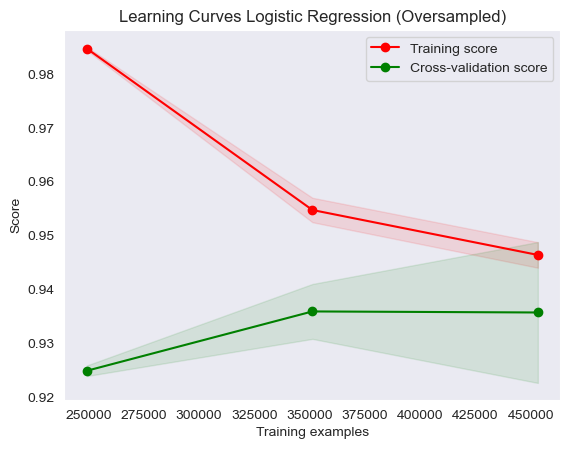

In [34]:
# Plot learning curves
plot_learning_curve(over_model, "Learning Curves Logistic Regression (Oversampled)", X_oversampled, y_oversampled)

Both models show learning curves with,

- **Training Score**: High and stable as the dataset size increases. This indicates that the model is fitting the data well and is not underfitting.
- **Validation Score**: Starts low but improves and stabilizes as the dataset size increases. The validation score should ideally be close to the training score. This indicates that the model generalizes well and is not overfitting.
- **Training and Validation Scores**: Converge to a similar value as the dataset size increases. The scores stabilize without large gaps, indicating a well-balanced model that fits and generalizes well.

## Conclusion

In this analysis, we embarked on a comprehensive exploration of dataset balancing techniques and their impact on the performance of logistic regression models. Our objective was to discern the effects of undersampling and oversampling on model outcomes, as compared to a logistic regression model trained on the original, imbalanced dataset.

To begin, we constructed a baseline using the original dataset, training a logistic regression model to capture the inherent patterns and class distributions. This initial model provided a benchmark for assessing the improvements achieved through subsequent balancing strategies. We achieved high test scores of 99.91%, however, the model also has very low recall of 52.22%.

Subsequently, we delved into undersampling and oversampling, techniques aimed at rectifying class imbalance by reducing or increasing instances in the majority or minority class. Enabling a direct comparison of results across all three scenarios.

* For the **Undersampled Model**:
    * Accuracy score of 96.10%
    * Recall of 94.73%
* For the **Oversampled Model**:
    * Accuracy score of 94.51%
    * Recall of 91.64%

By comparing the logistic regression models, each representing a distinct approach to data balancing. We gained insights into the relative merits of undersampling, oversampling, and the original imbalanced dataset. These insights are paramount in making informed decisions about the choice of data preprocessing techniques and their implications on model outcomes.

In conclusion, our analysis illuminated the pivotal role that dataset balancing techniques play in enhancing the performance of logistic regression models.